In [312]:
import numpy as np

In [313]:
import matplotlib.pyplot as plt

# Classification Dataset

In [413]:
#load dataset
from sklearn.datasets import load_digits
digits=load_digits()
print("digits.keys():\n", digits.keys())

digits.keys():
 dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [414]:
# data set description
i=70
print(digits['DESCR'][:i]+ "\n...") #increase i for more info

.. _digits_dataset:

Optical recognition of handwritten digits dataset
...


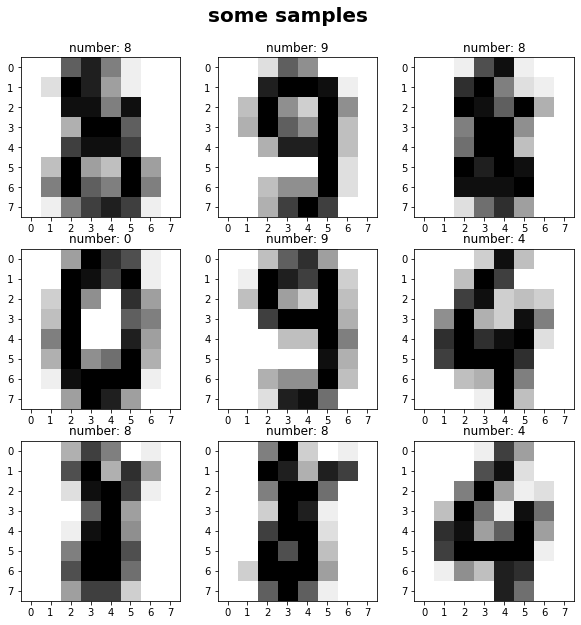

In [790]:
# plot samples
fig,axes =plt.subplots(3,3, figsize=(10, 10))
fig.suptitle('some samples', fontsize=20, fontweight='bold',y=.95)
for i,ax in zip(range(1,10),axes.ravel()):
    ax.xaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.yaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.imshow(digits.images[-i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("number: {:}".format(digits.target[-i]))

In [416]:
#amount of samples and features per sample
print("Shape of digit data:", digits.data.shape)

Shape of digit data: (1797, 64)


In [417]:
#target names
print("Target names:",digits.target_names)

Target names: [0 1 2 3 4 5 6 7 8 9]


In [418]:
#sample counts per class
print("Sample counts per class:\n",
      {n: v for n, v in zip(digits.target_names, np.bincount(digits.target))})

Sample counts per class:
 {0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


In [419]:
#splitting data in test and train datasets
from sklearn.model_selection import train_test_split
cla_X_train, cla_X_test, cla_y_train, cla_y_test = train_test_split(
    digits['data'], digits['target'], random_state=0) #random_state is seed for random number generation

# Regression Dataset

In [420]:
#load dataset
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
print("diabetes.keys():\n", diabetes.keys())

diabetes.keys():
 dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [421]:
# data set description
i=326
print(digits['DESCR'][:i]+ "\n...") #increase i for more info

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
...


In [422]:
#amount of samples and features per sample
print("Shape of digit data:", digits.data.shape)

Shape of digit data: (1797, 64)


In [423]:
#target names
print("Target names:", diabetes.feature_names)

Target names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [424]:
#splitting data in test and train datasets
from sklearn.model_selection import train_test_split
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(
    diabetes['data'], diabetes['target'], random_state=0) #random_state is seed for random number generation

## k-nearast neighbors (knn)

#### For small datasets, good as a baseline, easy to explain. 

### knn classifier

In [736]:
#Import
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
#Train
knn.fit(cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(knn.score(cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(knn.score(cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",KNeighborsClassifier())

Training set score: 0.99
Test set score: 0.99

 Possible Modifications: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


# Example for Outputting Predictions of Classifier

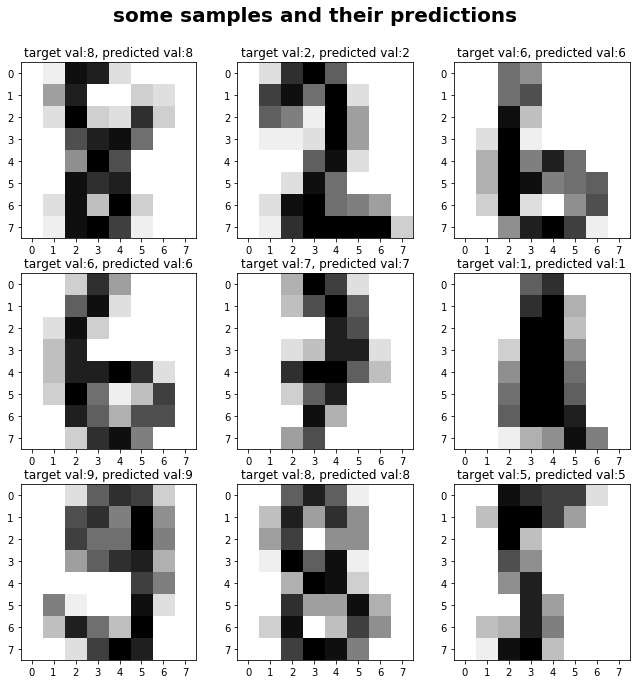

In [786]:
# plot samples
fig,axes =plt.subplots(3,3, figsize=(11, 11))
fig.suptitle('some samples and their predictions', fontsize=20, fontweight='bold',y=.95)
for i,ax in zip(range(1,10),axes.ravel()):
    pic=cla_X_test[i].reshape(8,8)
    ax.xaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.yaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.imshow(pic, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("target val:{:}, predicted val:{:}".format(cla_y_test[i],knn.predict(cla_X_test)[i]))

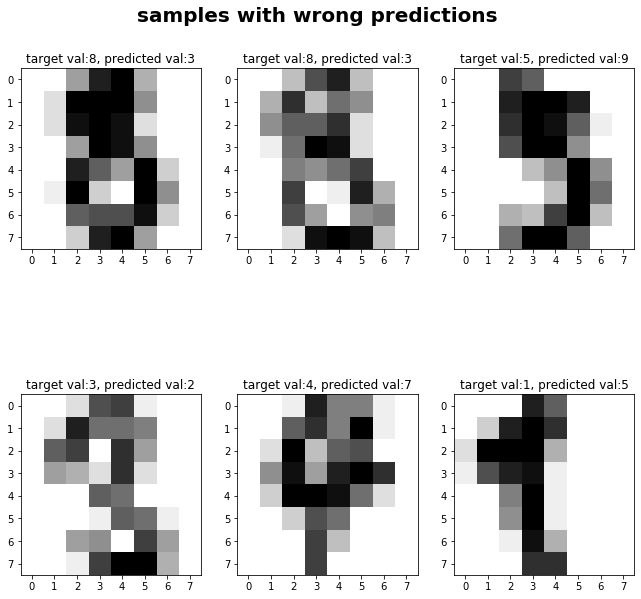

In [789]:
# show samples with wrong predictions
wrong=np.where(knn.predict(cla_X_test)!=cla_y_test)[0]

# plot nine samples
fig,axes =plt.subplots(2,3, figsize=(11, 11))
fig.suptitle('samples with wrong predictions', fontsize=20, fontweight='bold',y=.9)
for i,ax in zip(wrong,axes.ravel()):
    pic=cla_X_test[i].reshape(8,8)
    ax.xaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.yaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.imshow(pic, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("target val:{:}, predicted val:{:}".format(cla_y_test[i],knn.predict(cla_X_test)[i]))

In [434]:
#Test predition for first ten results
print("Predicted results:")
for x in tuple(zip(knn.predict(cla_X_test),digits['target_names'][cla_y_test]))[0:10]: 
    print(x) 

Predicted results:
(2, 2)
(8, 8)
(2, 2)
(6, 6)
(6, 6)
(7, 7)
(1, 1)
(9, 9)
(8, 8)
(5, 5)


In [455]:
# predicted probabilities for correct predictions of sample 65 to 70
print("Predicted probabilities:")
for i in range(65,71):
    print(knn.predict_proba(cla_X_test)[i])

Predicted probabilities:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.         0.         0.33333333 0.33333333 0.         0.
 0.         0.33333333 0.         0.        ]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### knn regressor


In [504]:
#Import
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=30)
#Train
knn.fit(reg_X_train, reg_y_train)
#Test
print("Training set score: {:.2f}".format(knn.score(reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(knn.score(reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",KNeighborsRegressor())

Training set score: 0.50
Test set score: 0.39

 Possible Modifications: 
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


## linear models

####  Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional data. 

### linear Support Vector Classifier (SVC)

##### better for better dimenisions. generalizes. 

In [803]:
#Import
from sklearn.svm import LinearSVC
lin = LinearSVC(max_iter=2000)
#Train
lin.fit(cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(lin.score(cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(lin.score(cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",LinearSVC())

Training set score: 0.99
Test set score: 0.94

 Possible Modifications: 
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### logistic regression classification

##### usually similiarly good as SVC. Try regression first

In [805]:
#Import
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01, max_iter=2000) #Modify C to prevent overfitting
#Train
log.fit(cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(log.score(cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(log.score(cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",LogisticRegression())

Training set score: 0.99
Test set score: 0.96

 Possible Modifications: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### linear regression (aka ordinary least squares)

##### good for high dimensions (many features). Can´t learn anything from less than about 400 samples

In [507]:
#Import
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Train
lr.fit(X_train, y_train)
#Test
print("Training set score: {:.2f}".format(lr.score(reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(lr.score(reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",LinearRegression())


Training set score: 0.56
Test set score: 0.36

 Possible Modifications: 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [508]:
#Coefficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354]
lr.intercept_: 153.06798218266258


### ridge regression

##### less likely to overfit than linear regression, as it generalizes more. Performace catches up for large sample sizes.

In [537]:
#Import
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.2)
#Train
ridge.fit(reg_X_train, reg_y_train)
#Test
print("Training set score: {:.2f}".format(ridge.score(reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(ridge.score(reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",Ridge())


Training set score: 0.54
Test set score: 0.38

 Possible Modifications: 
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


### lasso regression

##### ridge is usually better. lasso might be better for data with many features, where only few will be of importance

In [558]:
#Import
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.1)
#Train
las.fit(reg_X_train, reg_y_train)
#Test
print("Training set score: {:.2f}".format(las.score(reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(las.score(reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",Ridge())

Training set score: 0.55
Test set score: 0.36

 Possible Modifications: 
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


##### usually works best. combines ridge and lasso. Downside is that is has two parameters (alpha and l1_ratio) to adjust

In [607]:
#Import
from sklearn.linear_model import ElasticNet
eln = ElasticNet(alpha=0.001)
#Train
eln.fit(reg_X_train, reg_y_train)
#Test
print("Training set score: {:.2f}".format(eln.score(reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(eln.score(reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",ElasticNet())

Training set score: 0.55
Test set score: 0.38

 Possible Modifications: 
 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
